In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from dmba import regressionSummary, classificationSummary
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
 

import matplotlib.pylab as plt

C:\Users\luisc\anaconda3\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
predic_df = pd.read_csv('Base_Proyecto.csv',encoding="ISO-8859-1")
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


# 1. PREPROCESAMIENTO DE DATOS EDA

Descripción tamaño base

In [3]:
predic_df.shape


(5110, 11)

Nombres de Columnas

In [4]:
#nombres de columnas
predic_df.columns

Index(['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence',
       'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Stroke'],
      dtype='object')

In [5]:
predic_df['Work'].unique()

array(['Private', 'Self-employed', 'k\x96sdh-k', 'Govt_job', 'sdsd-i',
       'children', 'Never_worked', 'dsfsdf', 'sdfsdf'], dtype=object)

In [6]:
predic_df.groupby(['Work']).count()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Work,,,,,,,,,,
Govt_job,657,657,657,657,657,630,657,657,657,657
Never_worked,22,22,22,22,22,22,22,22,22,22
Private,2919,2919,2919,2919,2919,2806,2919,2919,2919,2919
Self-employed,818,818,818,818,818,774,818,818,818,818
children,687,687,687,687,687,671,687,687,687,687
dsfsdf,2,2,2,2,2,2,2,2,2,2
ksdh-k,1,1,1,1,1,0,1,1,1,1
sdfsdf,3,3,3,3,3,3,3,3,3,3
sdsd-i,1,1,1,1,1,1,1,1,1,1


In [7]:
predic_df["Work"].replace(["dsfsdf","sdsd-i","sdfsdf","k\x96sdh-k"],"Private", inplace=True)
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,Private,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


In [8]:
predic_df.groupby(['Work']).count()

,Hypertension,Heart Disease,Married,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
Work,,,,,,,,,,
Govt_job,657,657,657,657,657,630,657,657,657,657
Never_worked,22,22,22,22,22,22,22,22,22,22
Private,2926,2926,2926,2926,2926,2812,2926,2926,2926,2926
Self-employed,818,818,818,818,818,774,818,818,818,818
children,687,687,687,687,687,671,687,687,687,687


In [9]:
# Muestra informacion relevante del df importado sobre todo el tipo de datos,los nulos, el numero de registros, entre otros
predic_df['Bmi'] = pd.Series([round(val,2) for val in predic_df['Bmi']])
predic_df['Bmi']
print(predic_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   object 
 3   Work               5110 non-null   object 
 4   Residence          5110 non-null   object 
 5   Avg_glucose_level  5110 non-null   float64
 6   Bmi                4909 non-null   float64
 7   Smoking            5110 non-null   object 
 8   Gender             5110 non-null   object 
 9   Age                5110 non-null   float64
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [10]:
predic_df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463720,43.226614,0.048728
std,0.296607,0.226063,45.283560,1140.662468,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


Análisis de Base, valores nulos/blancos y valores atípicos

Valores Nulos/Blancos

In [12]:
predic_df.isna().sum()

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  201
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64

In [13]:
predic_df['Bmi'].fillna(predic_df['Bmi'].mean(), inplace = True)

In [14]:
predic_df.isna().sum()

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64

In [15]:
predic_df['Bmi'] = pd.Series([round(val,2) for val in predic_df['Bmi']])
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,61.46,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.50,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.40,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,61.46,never smoked,Female,80.0,0
5106,0,0,Yes,Private,Urban,125.20,40.00,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,Male,51.0,0


In [16]:
predic_df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463573,43.226614,0.048728
std,0.296607,0.226063,45.283560,1117.999161,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.800000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.400000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,34.000000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


In [17]:
predic_df.max()

Hypertension                1
Heart Disease               1
Married                   Yes
Work                 children
Residence               Urban
Avg_glucose_level      271.74
Bmi                   40000.0
Smoking                smokes
Gender                  Other
Age                      82.0
Stroke                      1
dtype: object

In [19]:
predic_df["Bmi"].replace([40000.0, 40000.0, 40000.0,40000.0],61.46, inplace=True)
predic_df.max()

Hypertension                1
Heart Disease               1
Married                   Yes
Work                 children
Residence               Urban
Avg_glucose_level      271.74
Bmi                      97.6
Smoking                smokes
Gender                  Other
Age                      82.0
Stroke                      1
dtype: object

In [20]:
predic_df.describe()

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,30.200528,43.226614,0.048728
std,0.296607,0.226063,45.283560,10.000611,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.800000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.400000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,34.000000,61.000000,0.000000
max,1.000000,1.000000,271.740000,97.600000,82.000000,1.000000


# 2. Visualización de Variables

Variables Categoricas

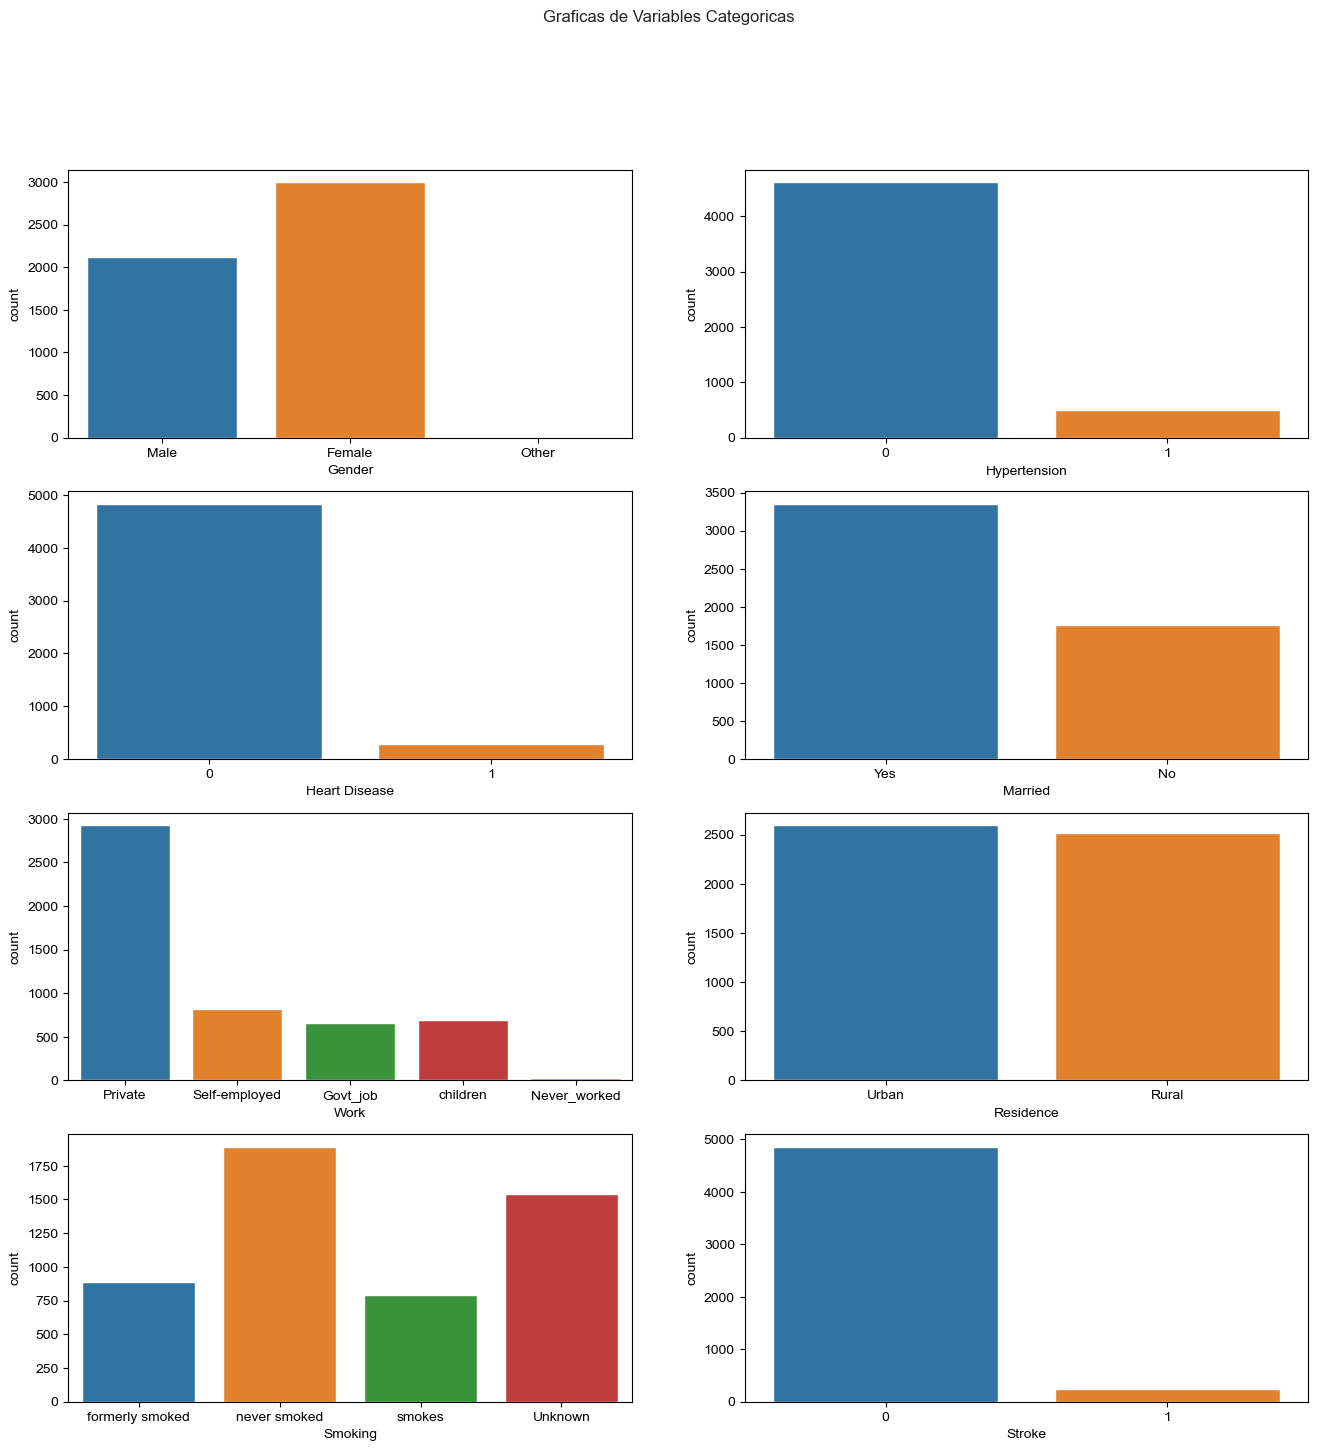

In [21]:
fig,axes = plt.subplots(4,2,figsize = (16,16))
sns.set_style('whitegrid')
fig.suptitle("Graficas de Variables Categoricas")

sns.countplot(ax=axes[0,0],data=predic_df,x='Gender')
sns.countplot(ax=axes[0,1],data=predic_df,x='Hypertension')
sns.countplot(ax=axes[1,0],data=predic_df,x='Heart Disease')
sns.countplot(ax=axes[1,1],data=predic_df,x='Married')
sns.countplot(ax=axes[2,0],data=predic_df,x='Work')
sns.countplot(ax=axes[2,1],data=predic_df,x='Residence')
sns.countplot(ax=axes[3,0],data=predic_df,x='Smoking')
sns.countplot(ax=axes[3,1],data=predic_df,x='Stroke')

plt.show()

**Variables Númericas**

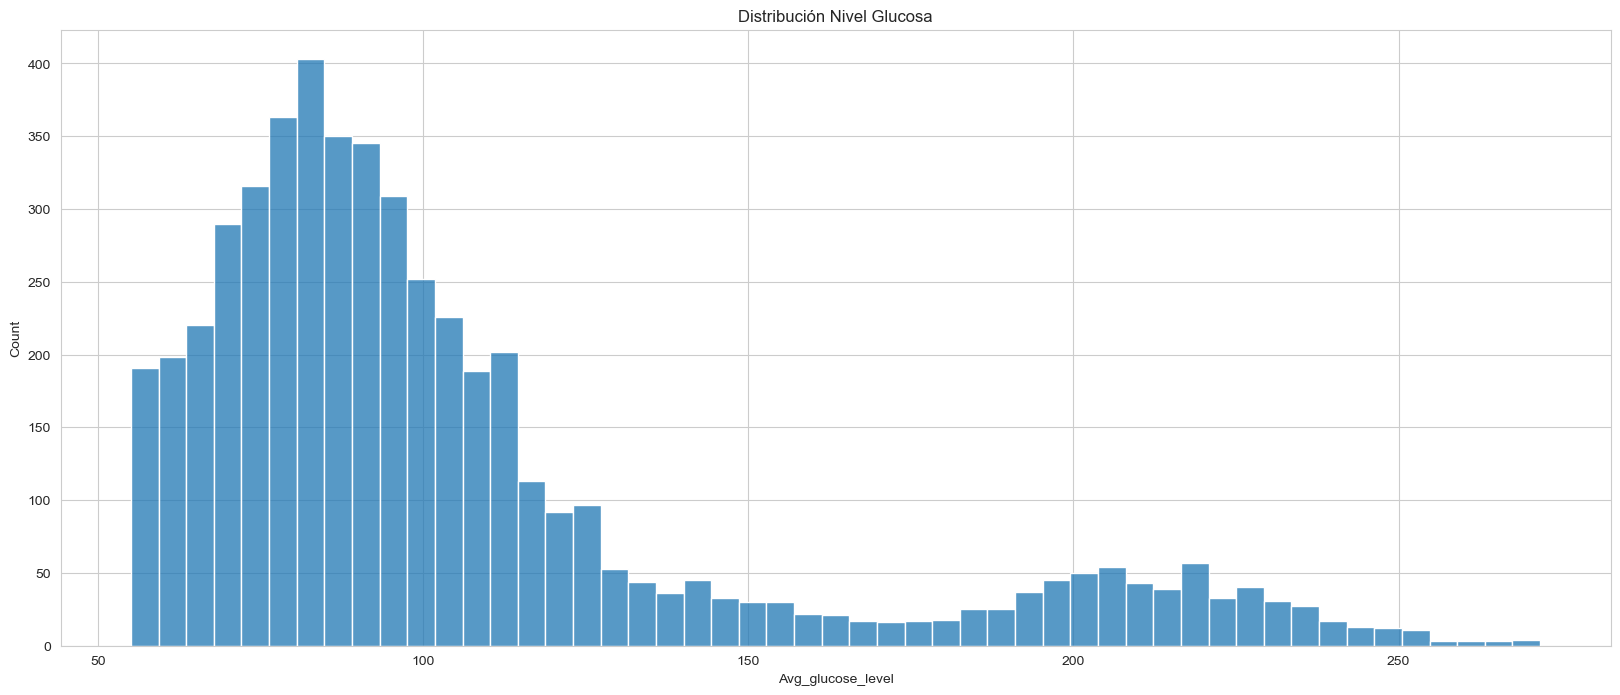

In [22]:
#NIVEL DE GLUCOSA

plt.figure(figsize= (20,8))
sns.histplot(predic_df['Avg_glucose_level'])
plt.title('Distribución Nivel Glucosa')
plt.show()

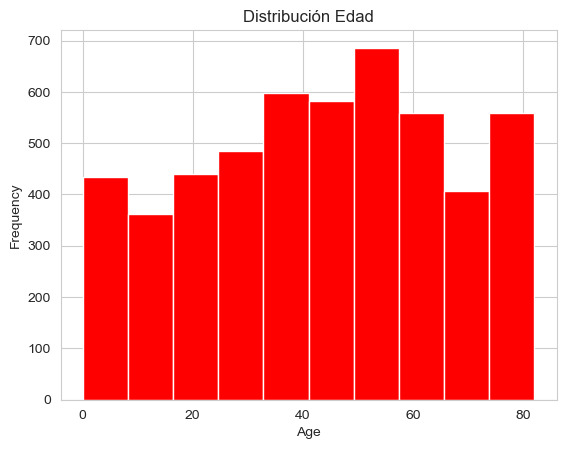

In [23]:
# EDAD
predic_df["Age"].plot.hist(color="red")
plt.title('Distribución Edad')
plt.xlabel("Age");

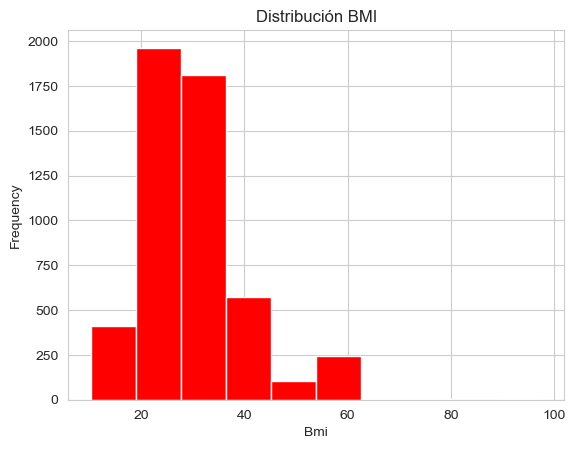

In [24]:
# Let's look at this distribution by ages 
predic_df["Bmi"].plot.hist(color="red")
plt.title('Distribución BMI')
plt.xlabel("Bmi");

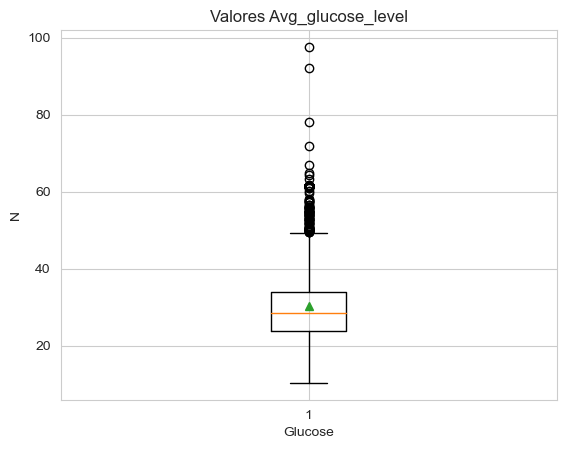

In [25]:
df=predic_df["Bmi"]
plt.boxplot(df, showmeans=True)
plt.title("Valores Avg_glucose_level")
plt.xlabel("Glucose")
plt.ylabel("N")
plt.show()

In [26]:
predic_df.corr()

C:\Users\luisc\AppData\Local\Temp\ipykernel_1448\301841338.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  predic_df.corr()


,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
Hypertension,1.000000,0.108306,0.174474,0.182844,0.276398,0.127904
Heart Disease,0.108306,1.000000,0.161857,0.091750,0.263796,0.134914
Avg_glucose_level,0.174474,0.161857,1.000000,0.186558,0.238171,0.131945
Bmi,0.182844,0.091750,0.186558,1.000000,0.298651,0.118801
Age,0.276398,0.263796,0.238171,0.298651,1.000000,0.245257
Stroke,0.127904,0.134914,0.131945,0.118801,0.245257,1.000000


C:\Users\luisc\AppData\Local\Temp\ipykernel_1448\2726733437.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = predic_df.corr()


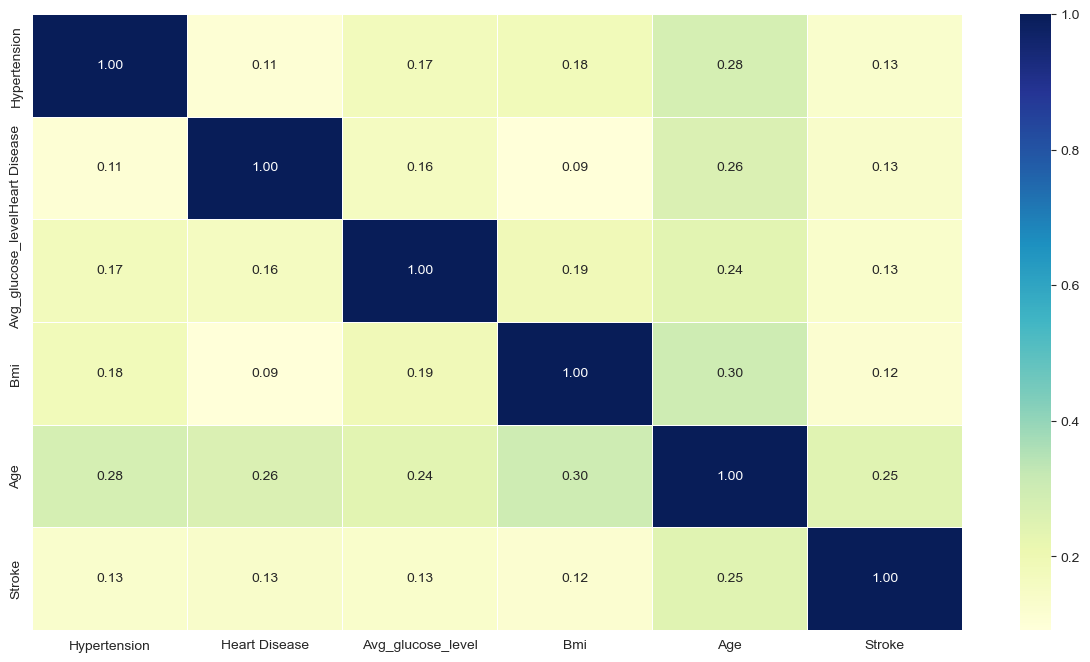

In [27]:
# Let's make the correlation matrix into a heatmap
corr_matrix = predic_df.corr() 
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(corr_matrix,
                 annot=True, 
                 linewidths=0.5,
                 fmt=".2f", 
                 cmap="YlGnBu" 
                );

# 2. ANÁLISIS DE BASES NO BALANCEADAS

**SMOTE**

In [28]:
# IDENTIFYING CATEGORICAL VARIABLES IN THE DATASET
cols = list(predic_df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cols)}")
print(f"Categorical columns:\n{cols}")

Number of categorical columns: 5
Categorical columns:
['Married', 'Work', 'Residence', 'Smoking', 'Gender']


In [29]:
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler

te = ce.TargetEncoder(cols=cols)
predic_df = te.fit_transform(predic_df, predic_df['Stroke'])
predic_df

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,0.065613,0.050923,0.052003,228.69,36.60,0.079096,0.051064,67.0,1
1,0,0,0.065613,0.079462,0.045346,202.21,61.46,0.047569,0.047094,61.0,1
2,0,1,0.065613,0.050923,0.045346,105.92,32.50,0.047569,0.051064,80.0,1
3,0,0,0.065613,0.050923,0.052003,171.23,34.40,0.053232,0.047094,49.0,1
4,1,0,0.065613,0.079462,0.045346,174.12,24.00,0.047569,0.047094,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,0.065613,0.050923,0.052003,83.75,61.46,0.047569,0.047094,80.0,0
5106,0,0,0.065613,0.050923,0.052003,125.20,40.00,0.047569,0.047094,81.0,0
5107,0,0,0.065613,0.079462,0.045346,82.99,30.60,0.047569,0.047094,35.0,0
5108,0,0,0.065613,0.050923,0.045346,166.29,25.60,0.079096,0.051064,51.0,0


In [30]:
numeric_cols = predic_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence', 'Avg_glucose_level', 'Bmi', 'Smoking', 'Gender', 'Age', 'Stroke']


In [31]:
names = predic_df.columns
indexes = predic_df.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
predic_df = sc.fit_transform(predic_df)
data_scaled = pd.DataFrame(predic_df, columns=names, index=indexes)
data_scaled.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0.0,1.0,1.0,0.627185,1.0,0.801265,0.301260,1.000000,1.000000,0.816895,1.0
1,0.0,0.0,1.0,1.000000,0.0,0.679023,0.586025,0.352031,0.542445,0.743652,1.0
2,0.0,1.0,1.0,0.627185,0.0,0.234512,0.254296,0.352031,1.000000,0.975586,1.0
3,0.0,0.0,1.0,0.627185,1.0,0.536008,0.276060,0.468425,0.542445,0.597168,1.0
4,1.0,0.0,1.0,1.000000,0.0,0.549349,0.156930,0.352031,0.542445,0.963379,1.0


In [34]:
y = data_scaled['Stroke']

#Extract the input features
x = data_scaled.drop(['Stroke'], axis=1)

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [36]:
x_train.shape, y_train.shape, x_train_resampled.shape, y_train_resampled.shape

((4088, 10), (4088,), (7802, 10), (7802,))

**XGBOOST**

In [37]:
xgb = XGBClassifier(random_state=10)
xgb.fit(x_train, y_train)

C:\Users\luisc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\luisc\anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[16:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
print(classification_report(y_test, xgb.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       960
         1.0       0.55      0.10      0.16        62

    accuracy                           0.94      1022
   macro avg       0.75      0.55      0.57      1022
weighted avg       0.92      0.94      0.92      1022

